In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [36]:
def build_point(receiveNo: str, sensorMac: str, sensorType: str, value: float, timestamp: int) -> str:
    # sensor_data,project_id=2,receive_no=0,sensor_mac=829C,sensor_type=receive_time value=1645583400960.0 1645582800000000000
    return f'sensor_data,project_id=3,receive_no={receiveNo},sensor_mac={sensorMac},sensor_type={sensorType} value={value} {timestamp}'

## 测试用例0

顺序发送，无延迟，采样频率相同

DatetimeIndex(['2021-05-18 10:00:00+00:00', '2021-05-18 10:10:00+00:00',
               '2021-05-18 10:20:00+00:00', '2021-05-18 10:30:00+00:00',
               '2021-05-18 10:40:00+00:00', '2021-05-18 10:50:00+00:00',
               '2021-05-18 11:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)


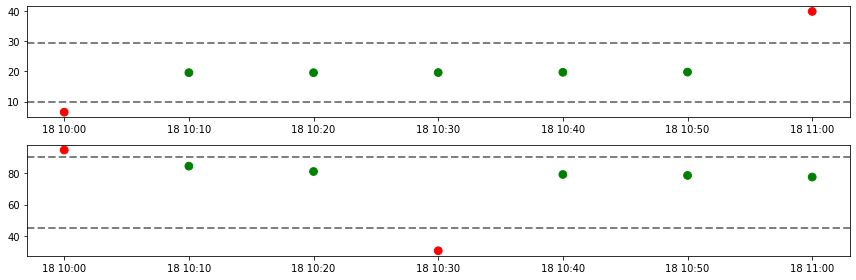

In [49]:

index = pd.date_range(start="2021-05-18T10:00:00Z", end="2021-05-18T11:00:00Z", periods=7)

temperature = np.array([6.47400665283203,
                        19.55980682373047,
                        19.55980682373047,
                        19.602706909179688,
                        19.688507080078125,
                        19.75286102294922,
                        39.860107421875])
humidity = np.array([94.4083251953125,
                    84.240478515625,
                    80.86065673828125,
                    30.8388671875,
                    78.991455078125,
                    78.38873291015625,
                    77.3587646484375])

assert len(index) == len(temperature)
print(index)

fig, ax = plt.subplots(2,1, figsize=(12, 4))

c1 = ['red' if x < 10.0 or x > 29.5 else 'green' for x in temperature]

ax[0].scatter(index, temperature, c=c1, s=60)
# ax[0].plot(index, temperature, color='blue', lw=1)
ax[0].axhline(10.0, c="gray", ls="--", lw=2)
ax[0].axhline(29.5, c="gray", ls="--", lw=2)

c2 = ['red' if x < 45.0 or x > 90.0 else 'green' for x in humidity]
ax[1].scatter(index, humidity, c=c2, s=60)
# ax[1].plot(index, humidity, color='blue', lw=1)
ax[1].axhline(45.0, c="gray", ls="--", lw=2)
ax[1].axhline(90.0, c="gray", ls="--", lw=2)
fig.tight_layout()

## 测试用例1

顺序发送，无延迟，采样频率不同

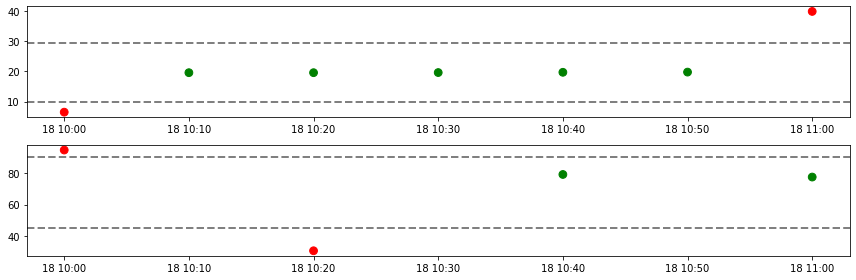

In [60]:
index = pd.date_range(start="2021-05-18T10:00:00Z", end="2021-05-18T11:00:00Z", periods=7)

temperature = np.array([6.47400665283203,
                        19.55980682373047,
                        19.55980682373047,
                        19.602706909179688,
                        19.688507080078125,
                        19.75286102294922,
                        39.860107421875])
humidity = np.array([94.4083251953125,
                    None,
                    30.8388671875,
                    None,
                    78.991455078125,
                    None,
                    77.3587646484375])

fig, ax = plt.subplots(2, 1, figsize=(12, 4))

c1 = ['red' if x < 10.0 or x > 29.5 else 'green' for x in temperature]

ax[0].scatter(index, temperature, c=c1, s=60)
ax[0].axhline(10.0, c="gray", ls="--", lw=2)
ax[0].axhline(29.5, c="gray", ls="--", lw=2)

c2 = ['red' if x is not None and  (x < 45.0 or x > 90.0) else 'green' for x in humidity]
ax[1].scatter(index, humidity, c=c2, s=60)
ax[1].axhline(45.0, c="gray", ls="--", lw=2)
ax[1].axhline(90.0, c="gray", ls="--", lw=2)
fig.tight_layout()

## 测试用例2

顺序发送，有延时，采样频率相同

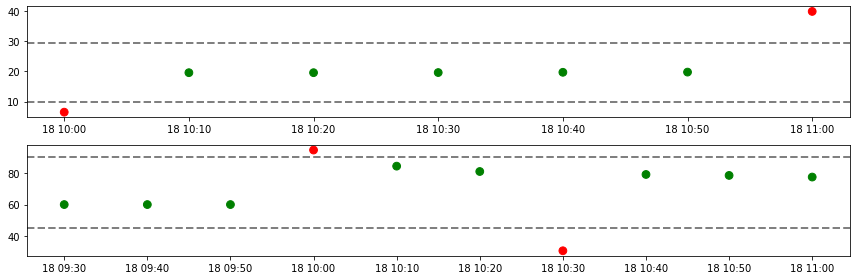

In [61]:
index = pd.date_range(start="2021-05-18T10:00:00Z", end="2021-05-18T11:00:00Z", periods=7)
index2 = pd.date_range(start="2021-05-18T09:30:00Z", end="2021-05-18T11:00:00Z", periods=10)

temperature = np.array([6.47400665283203,
                        19.55980682373047,
                        19.55980682373047,
                        19.602706909179688,
                        19.688507080078125,
                        19.75286102294922,
                        39.860107421875])
humidity = np.array([60, 60, 60, 
                    94.4083251953125,
                    84.240478515625,
                    80.86065673828125,
                    30.8388671875,
                    78.991455078125,
                    78.38873291015625,
                    77.3587646484375])

fig, ax = plt.subplots(2,1, figsize=(12, 4))

c1 = ['red' if x < 10.0 or x > 29.5 else 'green' for x in temperature]

ax[0].scatter(index, temperature, c=c1, s=60)
# ax[0].plot(index, temperature, color='blue', lw=1)
ax[0].axhline(10.0, c="gray", ls="--", lw=2)
ax[0].axhline(29.5, c="gray", ls="--", lw=2)

c2 = ['red' if x is not None and (x < 45.0 or x > 90.0) else 'green' for x in humidity]
ax[1].scatter(index2, humidity, c=c2, s=60)
# ax[1].plot(index, humidity, color='blue', lw=1)
ax[1].axhline(45.0, c="gray", ls="--", lw=2)
ax[1].axhline(90.0, c="gray", ls="--", lw=2)
fig.tight_layout()

## 测试用例3

顺序发送，有延时，采样频率不同